# Supervised Learning, Regression

## Predicting Medical Insurance Charges Using Regression Models

## Problem statement

### The goal is to predict an individual’s medical insurance charges based on demographic and lifestyle attributes such as age, BMI, smoking status, and region. Accurate prediction helps insurers understand cost drivers and assess risk more effectively.

## Management/Research Question
### In layman’s terms, what is the management/research question of interest, and why would anyone care?  

## Requirements
### -Conduct your analysis using a cross-validation design.
### -Conduct EDA and provide appropriate visualizations in the process.
### -Build a minimum of two separate regression models using the training ### set.
### -Evaluate polynomial, indicator, dichotomous, & piecewise model ### components.
### -Create at least one feature from the data set.
### -Evaluate the models’ assumptions.
### -Evaluate goodness of fit metrics on the training and validation sets.
### -Submit predictions for the unseen test set available on Kaggle.com.
### -Provide your Kaggle user name and a screen snapshot of your Kaggle ### scores.
### -Discuss what your models tell you in layman’s terms

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load and inspect the data

In [2]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/NW - 2026WI - 422/TA Session 1')

In [4]:
#load the dataset
df = pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Exploratory Data Analysis

In [7]:
# Summary statistics
df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


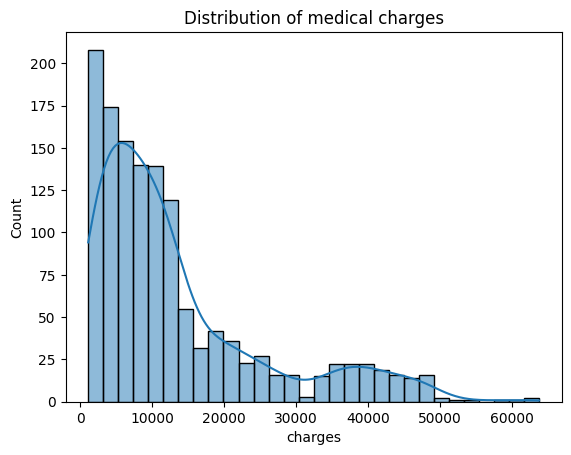

In [8]:
# Distribution of the target variable
sns.histplot(df['charges'], kde = True)
plt.title("Distribution of medical charges")
plt.show()

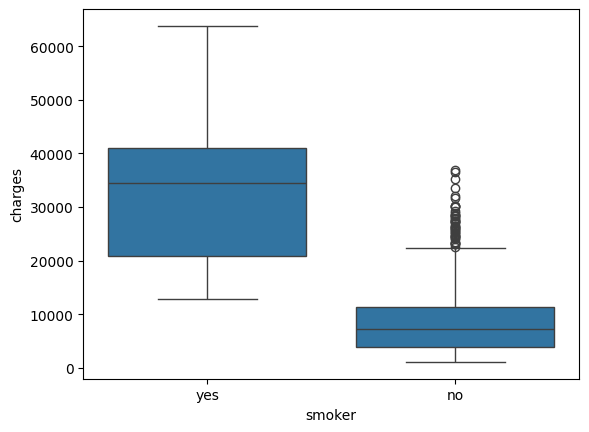

In [9]:
# Association (relationship between varaibles of one/two varaibles are categorical) between Smoking status and the charges

sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.show()

In [ ]:
# from the box plot it is understood that there is a significant difference in the charges between the smoker and the smoker.
# It is evident that the charges are significantly higher for the smoker than the non-smoker
# value addtion -  ztest (Accepting / Rejecting the Ho)

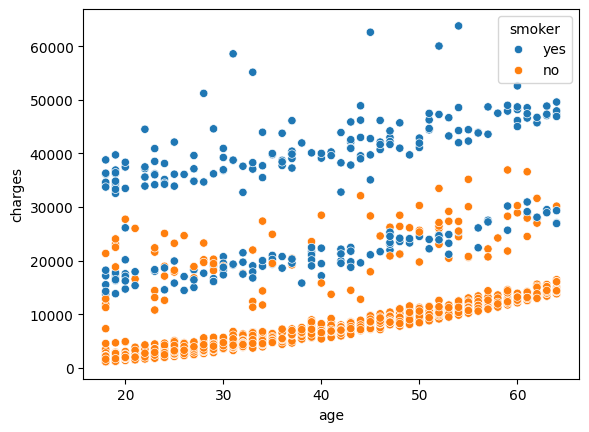

In [12]:
# Age Vs Charges
# relationship between the age and charges -> visualization (scatter plot) -> statistical representation (correlation)

sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df)
plt.show()

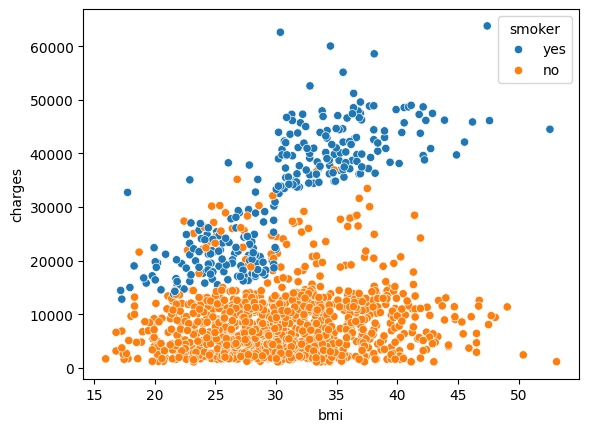

In [16]:
# bmi vs charges
sns.scatterplot(x = 'bmi', y = 'charges',hue = 'smoker', data = df)
plt.show()

In [17]:
# Feature Engineering
# interaction feature

df['bmi_smoker'] = df['bmi'] * (df['smoker']=='yes').astype(int)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,27.9
1,18,male,33.770,1,no,southeast,1725.55230,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0


In [21]:
# encode categorical variable

df_encoded = pd.get_dummies(df, drop_first = True)
df_encoded .head()

,age,bmi,children,charges,bmi_smoker,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,27.9,False,True,False,False,True
1,18,33.770,1,1725.55230,0.0,True,False,False,True,False
2,28,33.000,3,4449.46200,0.0,True,False,False,True,False
3,33,22.705,0,21984.47061,0.0,True,False,True,False,False
4,32,28.880,0,3866.85520,0.0,True,False,True,False,False


In [23]:
# train  test split

from sklearn.model_selection import train_test_split

X = df_encoded.drop('charges', axis = 1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(936, 9)
(936,)
(402, 9)
(402,)


In [24]:
# Model 1: Base line linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

In [30]:
np.array(y_train)[:10]

array([13429.0354 , 24603.04837, 27322.73386, 42303.69215, 42112.2356 ,
       41676.0811 ,  4562.8421 ,  3490.5491 , 12485.8009 ,  6748.5912 ])

In [26]:
y_train_predict[:10]

array([14047.11330544,  8991.12040398, 13260.53912728, 36563.26655583,
       50658.80880097, 41617.67876927,  6338.27341412,  5416.40133936,
       13784.83750357,  8955.36629717])

In [31]:
np.array(y_test)[:10]

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [27]:
y_test_predict[:10]

array([11200.82000098,  7320.88040949, 33077.9779728 , 10898.18460935,
       28125.16567543,  6701.6221747 ,  2553.25846471, 14619.25536358,
        5456.70435762, 11786.19425213])

In [33]:
# Model evaluation function

def evaluate (model, X_train, X_test, y_train, y_test):
  return{
      "Train RMSE": mean_squared_error(model.predict(X_train), y_train),
      "Test RMSE": mean_squared_error(model.predict(X_test), y_test),
      "Train R2": r2_score(model.predict(X_train), y_train),
      "Test R2": r2_score(model.predict(X_test), y_test)
  }

print("Base line model:", evaluate(lr,X_train, X_test, y_train, y_test ))

Base line model: {'Train RMSE': 24701072.415315297, 'Test RMSE': 20184660.82605393, 'Train R2': 0.7971453076566476, 'Test R2': 0.847200325733189}


In [43]:
# Model 2: enhanced regression (polynomial and piecewise)

def add_engineered_features(X):
  X = X.copy()
  X["age_sq"] = X['age']**2
  X["bmi_above_30"] = (X['bmi']-30).clip(0)
  return X

In [44]:
X_train_enh = add_engineered_features(X_train)
X_test_enh = add_engineered_features(X_test)


In [49]:
X_train_enh.head()

,age,bmi,children,bmi_smoker,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_sq,bmi_above_30
332,61,31.160,0,0.000,False,False,True,False,False,3721,1.160
355,46,27.600,0,0.000,True,False,False,False,True,2116,0.000
138,54,31.900,3,0.000,False,False,False,True,False,2916,1.900
381,55,30.685,0,30.685,True,True,False,False,False,3025,0.685
292,25,45.540,2,45.540,True,True,False,True,False,625,15.540


In [50]:
X_test_enh.head()

,age,bmi,children,bmi_smoker,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_sq,bmi_above_30
764,45,25.175,2,0.000,False,False,False,False,False,2025,0.00
887,36,30.020,0,0.000,False,False,True,False,False,1296,0.02
890,64,26.885,0,26.885,False,True,True,False,False,4096,0.00
1293,46,25.745,3,0.000,True,False,True,False,False,2116,0.00
259,19,31.920,0,31.920,True,True,True,False,False,361,1.92


In [46]:
lr2 = LinearRegression()
lr2.fit(X_train_enh, y_train)

LinearRegression()

In [52]:
print("Base line model:", evaluate(lr,X_train, X_test, y_train, y_test ))
print("Enhanced Regression model:", evaluate(lr2,X_train_enh, X_test_enh, y_train, y_test ))

Base line model: {'Train RMSE': 24701072.415315297, 'Test RMSE': 20184660.82605393, 'Train R2': 0.7971453076566476, 'Test R2': 0.847200325733189}
Enhanced Regression model: {'Train RMSE': 24197046.885773543, 'Test RMSE': 19795294.329014998, 'Train R2': 0.8021037013527604, 'Test R2': 0.8485014772732382}


In [54]:
# K-Fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

def cross_validate_model(X, y, enhanced = False):
  rmse_list, r2_list = [], []

  for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    if enhanced:
      X_train = add_engineered_features(X_train)
      X_test = add_engineered_features(X_test)

    model = LinearRegression()
    model.fit(X_train, y_train)

    rmse_list.append(mean_squared_error(model.predict(X_test), y_test))
    r2_list.append(r2_score(model.predict(X_test), y_test))
  return np.mean(rmse_list), np.mean(r2_list)

In [56]:
cv_lr= cross_validate_model(X, y, enhanced = False)
cv_lr2 = cross_validate_model(X, y, enhanced = True)
print("Baseline CV RMSE, R2: ", cv_lr)
print("Enhance CV RMSE, R2: ", cv_lr2)

Baseline CV RMSE, R2:  (np.float64(23636596.883560784), np.float64(0.8018091398903209))
Enhance CV RMSE, R2:  (np.float64(23211146.179396864), np.float64(0.8061770163270253))


In [63]:
# Checking for model assumption
# Multicollinearity
# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_vif = add_engineered_features(X)

# Convert boolean columns to integers (0s and 1s)
# The columns sex_male, smoker_yes, region_northwest, region_southeast, region_southwest are boolean in X
boolean_cols = X_vif.select_dtypes(include='bool').columns
X_vif[boolean_cols] = X_vif[boolean_cols].astype(int)

X_vif_const = sm.add_constant(X_vif)

vif_df = pd.DataFrame()
vif_df['Features'] = X_vif_const.columns
vif_df['VIF'] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

vif_df.sort_values("VIF", ascending = False)

,Features,VIF
0,const,177.318808
1,age,47.644662
10,age_sq,47.591037
4,bmi_smoker,25.536380
6,smoker_yes,25.205589
2,bmi,5.321339
11,bmi_above_30,5.049182
8,region_southeast,1.654718
9,region_southwest,1.534279
7,region_northwest,1.526559


In [60]:
X_vif_const.head()

,const,age,bmi,children,bmi_smoker,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_sq,bmi_above_30
0,1.0,19,27.900,0,27.9,False,True,False,False,True,361,0.00
1,1.0,18,33.770,1,0.0,True,False,False,True,False,324,3.77
2,1.0,28,33.000,3,0.0,True,False,False,True,False,784,3.00
3,1.0,33,22.705,0,0.0,True,False,True,False,False,1089,0.00
4,1.0,32,28.880,0,0.0,True,False,True,False,False,1024,0.00


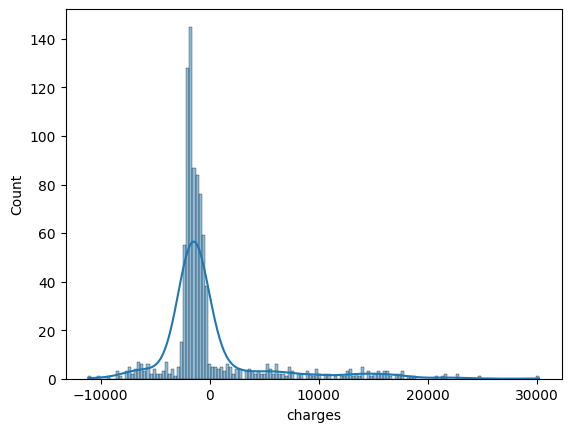

In [64]:
# Residuals
residuals = y_train - lr.predict(X_train)
sns.histplot(residuals, kde = True)
plt.show()

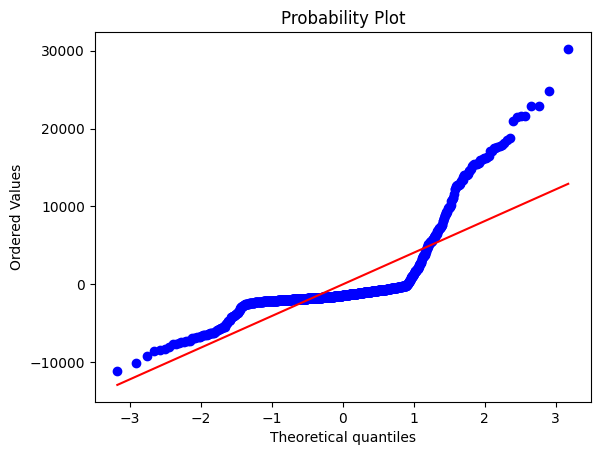

In [66]:
# Q-Q plot
from scipy import stats

stats.probplot(residuals, dist = 'norm', plot = plt)
plt.show()

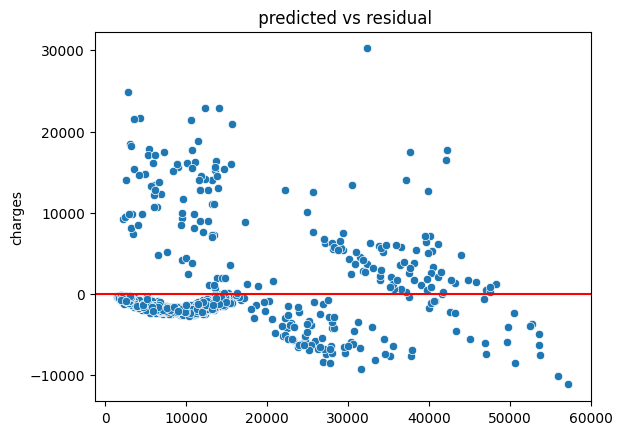

In [67]:
# homoscedasticity
sns.scatterplot(x = lr.predict(X_train), y = residuals)
plt.axhline(0, color = "red")
plt.title(" predicted vs residual")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

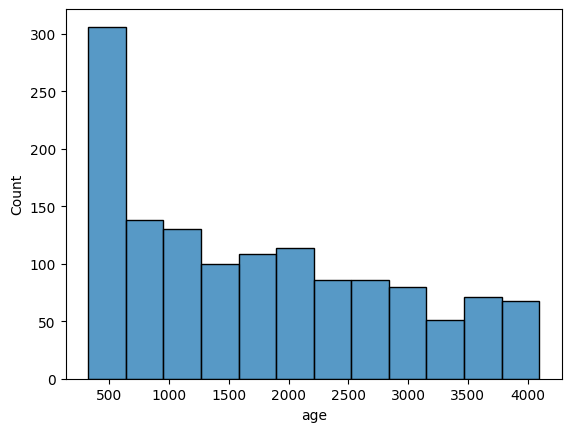

In [69]:
sns.histplot(df['age']**2)



In [73]:
X_train_enh.head()

,age,bmi,children,bmi_smoker,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_sq,bmi_above_30
332,61,31.160,0,0.000,False,False,True,False,False,3721,1.160
355,46,27.600,0,0.000,True,False,False,False,True,2116,0.000
138,54,31.900,3,0.000,False,False,False,True,False,2916,1.900
381,55,30.685,0,30.685,True,True,False,False,False,3025,0.685
292,25,45.540,2,45.540,True,True,False,True,False,625,15.540


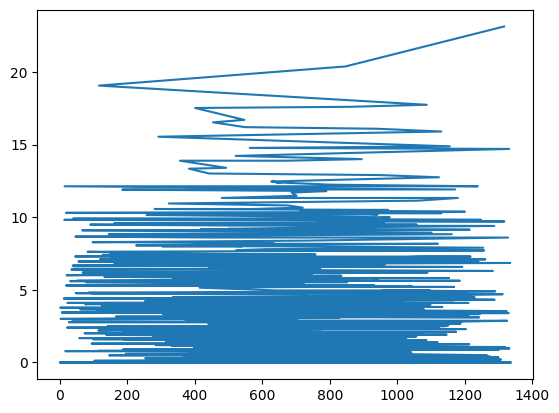

In [74]:
plt.plot(X_train_enh['bmi_above_30'].sort_values())

In [75]:
lr.coef_

array([   267.73627072,     28.79484911,    482.77582796,   1464.87106871,
         -425.28801126, -21032.30484701,   -644.27254305,  -1026.32849839,
        -1156.42370964])

In [76]:
X_train_enh.columns

Index(['age', 'bmi', 'children', 'bmi_smoker', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest', 'age_sq',
       'bmi_above_30'],
      dtype='object')

<Axes: xlabel='bmi_above_30', ylabel='charges'>

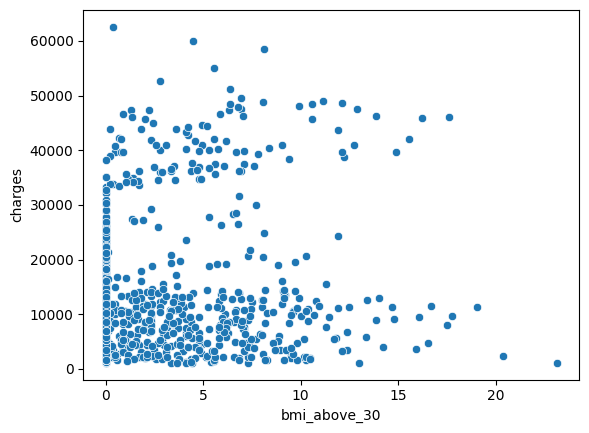

In [78]:
sns.scatterplot(x = X_train_enh['bmi_above_30'], y = y_train)

<Axes: xlabel='bmi', ylabel='charges'>

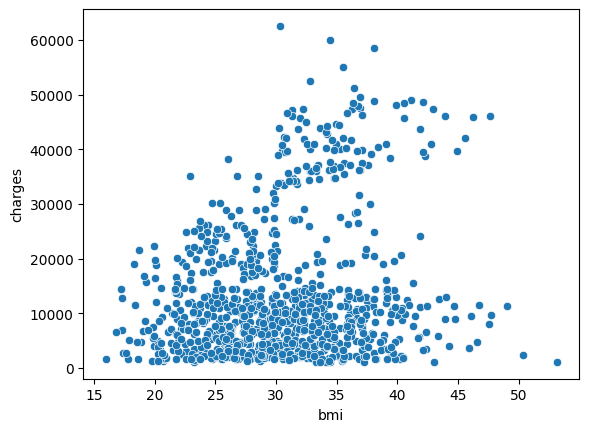

In [79]:
sns.scatterplot(x = X_train_enh['bmi'], y = y_train)